In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.feature_extraction.text import CountVectorizer
from IPython.core.display import Image, display
from IPython.core.display import HTML
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


# Machine learning library/functions
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
from sklearn import linear_model
import sklearn.linear_model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Additional librariers used for modeling and evaluation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score

# TPOT used to optimize and model pipelines

from tpot import TPOTClassifier
from tpot import TPOTRegressor

In [2]:
%store -r calls_for_violent_crimes
%store -r calls_for_property_crimes

In [3]:
calls_for_violent_crimes.head()

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,Year,event,Month,Hour,Day
10,200 Block Of Taylor St,Premise Address,2016-09-20 17:48:00,San Francisco,162643133,REP,2016-09-20T00:00:00.000,Robbery,2016-09-20T00:00:00.000,CA,2016,1,09 September,17,Tuesday
177,Market St/van Ness Av,Intersection,2016-09-21 01:10:00,San Francisco,162650152,REP,2016-09-21T00:00:00.000,Sexual Assault Adult,2016-09-21T00:00:00.000,CA,2016,1,09 September,01,Wednesday
247,700 Blk Ofarrell St,Geo-Override,2016-09-21 02:45:00,San Francisco,162650278,REP,2016-09-21T00:00:00.000,Robbery,2016-09-21T00:00:00.000,CA,2016,1,09 September,02,Wednesday
306,400 Block Of Gough St,Premise Address,2016-09-21 04:06:00,San Francisco,162650376,REP,2016-09-21T00:00:00.000,Strongarm Robbery,2016-09-21T00:00:00.000,CA,2016,1,09 September,04,Wednesday
410,500 Block Of Stanyan St,Common Location,2016-09-21 06:20:00,San Francisco,162650547,REP,2016-09-21T00:00:00.000,Sexual Assault Adult,2016-09-21T00:00:00.000,CA,2016,1,09 September,06,Wednesday


In [4]:
calls_for_property_crimes.head()

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,Year,event,Month,Hour,Day
2,900 Block Of Market St,Premise Address,2016-09-20 14:01:00,San Francisco,162642180,HAN,2016-09-20T00:00:00.000,Burglary,2016-09-20T00:00:00.000,CA,2016,1,09 September,14,Tuesday
3,1900 Block Of Palou Av,Premise Address,2016-09-20 14:30:00,San Francisco,162642293,REP,2016-09-20T00:00:00.000,Burglary,2016-09-20T00:00:00.000,CA,2016,1,09 September,14,Tuesday
18,300 Block Of 4th St,Premise Address,2016-09-20 18:36:00,San Francisco,162643342,GOA,2016-09-20T00:00:00.000,Petty Theft,2016-09-20T00:00:00.000,CA,2016,1,09 September,18,Tuesday
24,800 Block Of Market St,Premise Address,2016-09-20 19:16:00,San Francisco,162643503,REP,2016-09-20T00:00:00.000,Grand Theft,2016-09-20T00:00:00.000,CA,2016,1,09 September,19,Tuesday
39,700 Block Of Broadway,Premise Address,2016-09-20 21:21:00,San Francisco,162643896,REP,2016-09-20T00:00:00.000,Auto Boost / Strip,2016-09-20T00:00:00.000,CA,2016,1,09 September,21,Tuesday


In [5]:
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m'))
calls_for_property_crimes['Month'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%m'))
calls_for_violent_crimes['Date'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%d'))
calls_for_property_crimes['Date'] = calls_for_property_crimes['call_dttm'].apply(lambda x: x.strftime('%d'))

In [6]:
#Replacing the day of weeks
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
calls_for_violent_crimes["Day"] = calls_for_violent_crimes["Day"].replace(data_week_dict)
#calls_for_property_crimes["Day"] = calls_for_property_crimes["Day"].replace(data_week_dict)

In [7]:
calls_for_violent_crimes['Hour']=calls_for_violent_crimes['Hour'].astype(np.int64)
calls_for_violent_crimes['Year']=calls_for_violent_crimes['Year'].astype(np.int64)
calls_for_violent_crimes['Month']=calls_for_violent_crimes['Month'].astype(np.int64)
calls_for_violent_crimes['Date']=calls_for_violent_crimes['Date'].astype(np.int64)

In [8]:
col_list1=['event','address_type','original_crimetype_name','city','Hour', 'Day', 'Year','Month','Date']
calls_for_violent_crimes_cleaned=calls_for_violent_crimes[col_list1]

In [9]:
calls_for_violent_crimes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10750 entries, 10 to 2277287
Data columns (total 9 columns):
event                      10750 non-null int64
address_type               10750 non-null object
original_crimetype_name    10750 non-null object
city                       10750 non-null object
Hour                       10750 non-null int64
Day                        10750 non-null int64
Year                       10750 non-null int64
Month                      10750 non-null int64
Date                       10750 non-null int64
dtypes: int64(6), object(3)
memory usage: 839.8+ KB


In [10]:
crimetype_var = pd.factorize(calls_for_violent_crimes_cleaned['original_crimetype_name'])
calls_for_violent_crimes_cleaned['original_crimetype_name'] = crimetype_var[0]
definition_list_crimetype = crimetype_var[1]

premisetype_var = pd.factorize(calls_for_violent_crimes_cleaned['address_type'])
calls_for_violent_crimes_cleaned['address_type'] = premisetype_var[0]
definition_list_premisetype = premisetype_var[1]

city_var = pd.factorize(calls_for_violent_crimes_cleaned['city']) 
calls_for_violent_crimes_cleaned['city'] = city_var[0]
definition_list_city = city_var[1]

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [11]:
calls_for_violent_crimes_cleaned.head()

,event,address_type,original_crimetype_name,city,Hour,Day,Year,Month,Date
10,1,0,0,0,17,2,2016,9,20
177,1,1,1,0,1,3,2016,9,21
247,1,2,0,0,2,3,2016,9,21
306,1,0,2,0,4,3,2016,9,21
410,1,3,1,0,6,3,2016,9,21


In [12]:
calls_for_violent_crimes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10750 entries, 10 to 2277287
Data columns (total 9 columns):
event                      10750 non-null int64
address_type               10750 non-null int64
original_crimetype_name    10750 non-null int64
city                       10750 non-null int64
Hour                       10750 non-null int64
Day                        10750 non-null int64
Year                       10750 non-null int64
Month                      10750 non-null int64
Date                       10750 non-null int64
dtypes: int64(9)
memory usage: 839.8 KB


In [13]:
g_grouped_violent=calls_for_violent_crimes_cleaned.groupby([(calls_for_violent_crimes_cleaned.Year),(calls_for_violent_crimes_cleaned.Month),(calls_for_violent_crimes_cleaned.Date)]).sum().reset_index()


In [14]:
g_grouped_violent_train2016 = g_grouped_violent.loc[(g_grouped_violent.Year == 2016)]
g_grouped_violent_train2017 = g_grouped_violent.loc[(g_grouped_violent.Year == 2017)]
g_grouped_violent_train2018 = g_grouped_violent.loc[(g_grouped_violent.Year == 2018) & (g_grouped_violent.Month < 6)]
frames=[g_grouped_violent_train2016,g_grouped_violent_train2017,g_grouped_violent_train2018]
g_grouped_violent_train = pd.concat(frames)
g_grouped_violent_train

,Year,Month,Date,event,address_type,original_crimetype_name,city,Hour,Day
0,2016,3,31,1,1,0,0,23,4
1,2016,4,1,15,22,28,0,199,75
2,2016,4,2,8,4,24,0,84,48
3,2016,4,3,8,4,22,0,53,56
4,2016,4,4,11,13,21,0,184,11
5,2016,4,5,13,24,22,1,171,26
6,2016,4,6,11,12,21,0,141,33
7,2016,4,7,8,11,12,0,126,32
8,2016,4,8,4,5,12,0,42,20
9,2016,4,9,9,11,26,0,97,54


In [15]:
X1 = g_grouped_violent_train.drop(['event','address_type','original_crimetype_name','city'],axis=1).values

y1 = g_grouped_violent_train['event'].values 

In [16]:
lm = sklearn.linear_model.LinearRegression()
model = lm.fit(X1, y1)

In [17]:
g_grouped_violent_test= g_grouped_violent.loc[(g_grouped_violent.Year == 2018) & (g_grouped_violent.Month >= 6)]
#g_grouped_violent_test
X1_test = g_grouped_violent_test.drop(['event','address_type','original_crimetype_name','city'],axis=1).values
y1_test = g_grouped_violent_test['event'].values 


In [18]:
predictions = lm.predict(X1_test)
#print(lm.score(X2_train,y2_train))
print(lm.score(X1_test,y1_test))

0.8109640356402465


In [19]:
#print(predictions)
prediction_df = pd.DataFrame(predictions, columns=['prediction'])
actual_df = pd.DataFrame(y1_test, columns=['actual'])
actual_dfx1 = pd.DataFrame(X1_test)

X1_final = pd.concat([actual_dfx1, prediction_df, actual_df],axis=1)

In [20]:
X1_final

,0,1,2,3,4,prediction,actual
0,2018,6,1,90,30,7.880113,6
1,2018,6,2,160,78,13.168435,13
2,2018,6,3,155,105,13.735070,15
3,2018,6,4,109,9,8.217521,9
4,2018,6,5,103,18,8.164591,9
5,2018,6,6,175,51,13.090064,17
6,2018,6,7,85,36,7.733766,9
7,2018,6,8,40,25,4.940343,5
8,2018,6,9,163,84,13.444705,14
9,2018,6,10,119,70,10.611209,10


In [21]:
search_space = [{"classifier":LinearRegression(),
                 'params':{'n_jobs':[-1]}},
                {"classifier":RandomForestRegressor(n_jobs=-1),
                 "params":{"n_estimators": np.arange(8,9,1),"max_features":['sqrt', 'log2']}},
               {"classifier": GradientBoostingRegressor(),
                'params':{"alpha": np.arange(0.7,0.9,.1), "loss":['ls','quantile']}},
               ]
best_acc = 0.0
best_clf = 0
for row in search_space:
    random_search = GridSearchCV(row['classifier'],param_grid = row['params'], cv=5)
    random_search.fit(X1, y1.ravel())
    print (random_search.best_params_)
    predictions = random_search.predict(X1_test)
    accuracy = metrics.r2_score(y1_test, predictions)
    mse = metrics.mean_squared_error(y1_test, predictions)
    print("mean squared error:", mse)
    print('Test set accuracy (r2_score) for best params: %.3f ' % accuracy)
    if accuracy > best_acc:
          best_acc = accuracy
          best_clf = row['classifier']
print("Best Acuracy score: %.3f " %best_acc)
print("Best Regressor: ",best_clf)

{'n_jobs': -1}
mean squared error: 2.6048500396784764
Test set accuracy (r2_score) for best params: 0.811 
{'max_features': 'sqrt', 'n_estimators': 8}
mean squared error: 2.549868574766355
Test set accuracy (r2_score) for best params: 0.815 
{'alpha': 0.7999999999999999, 'loss': 'ls'}
mean squared error: 2.16457243117206
Test set accuracy (r2_score) for best params: 0.843 
Best Acuracy score: 0.843 
Best Regressor:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


Text(0.5,1,'Violent crime - Actual vs Predicted values')

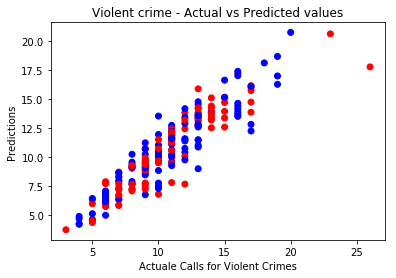

In [22]:

plt.scatter(y1_test, predictions, color=['red','blue'])
plt.xlabel('Actuale Calls for Violent Crimes')
plt.ylabel('Predictions')
plt.title('Violent crime - Actual vs Predicted values')

## PROPERTY CRIME

In [23]:
calls_for_property_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106607 entries, 2 to 2277299
Data columns (total 16 columns):
address                    106607 non-null object
address_type               106607 non-null object
call_dttm                  106607 non-null datetime64[ns]
city                       106607 non-null object
crime_id                   106607 non-null int64
disposition                106607 non-null object
offense_date               106607 non-null object
original_crimetype_name    106607 non-null object
report_date                106607 non-null object
state                      106607 non-null object
Year                       106607 non-null object
event                      106607 non-null int64
Month                      106607 non-null object
Hour                       106607 non-null object
Day                        106607 non-null object
Date                       106607 non-null object
dtypes: datetime64[ns](1), int64(2), object(13)
memory usage: 13.8+ MB


In [24]:
calls_for_property_crimes.head(10)

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,Year,event,Month,Hour,Day,Date
2,900 Block Of Market St,Premise Address,2016-09-20 14:01:00,San Francisco,162642180,HAN,2016-09-20T00:00:00.000,Burglary,2016-09-20T00:00:00.000,CA,2016,1,09,14,Tuesday,20
3,1900 Block Of Palou Av,Premise Address,2016-09-20 14:30:00,San Francisco,162642293,REP,2016-09-20T00:00:00.000,Burglary,2016-09-20T00:00:00.000,CA,2016,1,09,14,Tuesday,20
18,300 Block Of 4th St,Premise Address,2016-09-20 18:36:00,San Francisco,162643342,GOA,2016-09-20T00:00:00.000,Petty Theft,2016-09-20T00:00:00.000,CA,2016,1,09,18,Tuesday,20
24,800 Block Of Market St,Premise Address,2016-09-20 19:16:00,San Francisco,162643503,REP,2016-09-20T00:00:00.000,Grand Theft,2016-09-20T00:00:00.000,CA,2016,1,09,19,Tuesday,20
39,700 Block Of Broadway,Premise Address,2016-09-20 21:21:00,San Francisco,162643896,REP,2016-09-20T00:00:00.000,Auto Boost / Strip,2016-09-20T00:00:00.000,CA,2016,1,09,21,Tuesday,20
47,1000 Block Of Polk St,Premise Address,2016-09-20 22:32:00,San Francisco,162644112,HAN,2016-09-20T00:00:00.000,Petty Theft,2016-09-20T00:00:00.000,CA,2016,1,09,22,Tuesday,20
48,600 Block Of Townsend St,Premise Address,2016-09-20 22:36:00,San Francisco,162644119,HAN,2016-09-20T00:00:00.000,Auto Boost / Strip,2016-09-20T00:00:00.000,CA,2016,1,09,22,Tuesday,20
52,0 Block Of Hartford St,Premise Address,2016-09-20 22:41:00,San Francisco,162644142,HAN,2016-09-20T00:00:00.000,Auto Boost / Strip,2016-09-20T00:00:00.000,CA,2016,1,09,22,Tuesday,20
66,700 Block Of Market St,Premise Address,2016-09-20 23:20:00,San Francisco,162644259,UTL,2016-09-20T00:00:00.000,Petty Theft,2016-09-20T00:00:00.000,CA,2016,1,09,23,Tuesday,20
76,300 Block Of Diamond St,Premise Address,2016-09-20 23:43:00,San Francisco,162644310,GOA,2016-09-20T00:00:00.000,Petty Theft,2016-09-20T00:00:00.000,CA,2016,1,09,23,Tuesday,20


In [25]:
calls_for_property_crimes['Hour']=calls_for_property_crimes['Hour'].astype(np.int64)
calls_for_property_crimes['Year']=calls_for_property_crimes['Year'].astype(np.int64)
calls_for_property_crimes['Month']=calls_for_property_crimes['Month'].astype(np.int64)
calls_for_property_crimes['Date']=calls_for_property_crimes['Date'].astype(np.int64)

In [26]:
#Replacing the day of weeks
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
#calls_for_violent_crimes["Day"] = calls_for_violent_crimes["Day"].replace(data_week_dict)
calls_for_property_crimes["Day"] = calls_for_property_crimes["Day"].replace(data_week_dict)

In [27]:
col_list2=['event','address_type','original_crimetype_name','city','Hour', 'Day', 'Year','Month','Date']

In [28]:
calls_for_property_crimes_cleaned=calls_for_property_crimes[col_list2]

In [29]:
calls_for_property_crimes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106607 entries, 2 to 2277299
Data columns (total 9 columns):
event                      106607 non-null int64
address_type               106607 non-null object
original_crimetype_name    106607 non-null object
city                       106607 non-null object
Hour                       106607 non-null int64
Day                        106607 non-null int64
Year                       106607 non-null int64
Month                      106607 non-null int64
Date                       106607 non-null int64
dtypes: int64(6), object(3)
memory usage: 8.1+ MB


In [30]:
crimetype_var = pd.factorize(calls_for_property_crimes_cleaned['original_crimetype_name'])
calls_for_property_crimes_cleaned['original_crimetype_name'] = crimetype_var[0]
definition_list_crimetype = crimetype_var[1]

premisetype_var = pd.factorize(calls_for_property_crimes_cleaned['address_type'])
calls_for_property_crimes_cleaned['address_type'] = premisetype_var[0]
definition_list_premisetype = premisetype_var[1]

city_var = pd.factorize(calls_for_property_crimes_cleaned['city']) 
calls_for_property_crimes_cleaned['city'] = city_var[0]
definition_list_city = city_var[1]

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [31]:
calls_for_property_crimes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106607 entries, 2 to 2277299
Data columns (total 9 columns):
event                      106607 non-null int64
address_type               106607 non-null int64
original_crimetype_name    106607 non-null int64
city                       106607 non-null int64
Hour                       106607 non-null int64
Day                        106607 non-null int64
Year                       106607 non-null int64
Month                      106607 non-null int64
Date                       106607 non-null int64
dtypes: int64(9)
memory usage: 8.1 MB


In [32]:

g_grouped_property=calls_for_property_crimes_cleaned.groupby([(calls_for_property_crimes_cleaned.Year),(calls_for_property_crimes_cleaned.Month),(calls_for_property_crimes_cleaned.Date)]).sum().reset_index()


In [33]:
g_grouped_property_train2016 = g_grouped_property.loc[(g_grouped_property.Year == 2016)]
g_grouped_property_train2017 = g_grouped_property.loc[(g_grouped_property.Year == 2017)]
g_grouped_property_train2018 = g_grouped_property.loc[(g_grouped_property.Year == 2018) & (g_grouped_property.Month < 6)]
frames=[g_grouped_property_train2016,g_grouped_property_train2017,g_grouped_property_train2018]
g_grouped_property_train = pd.concat(frames)
g_grouped_property_train

,Year,Month,Date,event,address_type,original_crimetype_name,city,Hour,Day
0,2016,3,31,7,1,10,0,145,28
1,2016,4,1,86,44,166,0,1152,430
2,2016,4,2,105,69,239,0,1437,630
3,2016,4,3,106,68,224,0,1365,742
4,2016,4,4,105,66,199,0,1454,105
5,2016,4,5,100,47,185,0,1321,200
6,2016,4,6,98,50,155,0,1411,294
7,2016,4,7,109,46,212,1,1427,436
8,2016,4,8,100,55,183,1,1336,500
9,2016,4,9,108,65,199,3,1546,648


In [34]:
X2 = g_grouped_property_train.drop(['event','address_type','original_crimetype_name','city'],axis=1).values

y2 = g_grouped_property_train['event'].values 
#split the data into train and test sets for numeric encoded dataset:

#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, shuffle=False)

In [35]:
lm = sklearn.linear_model.LinearRegression()
model = lm.fit(X2, y2)

In [36]:
g_grouped_property_test= g_grouped_property.loc[(g_grouped_property.Year == 2018) & (g_grouped_property.Month >= 6)]
#g_grouped_violent_test
X2_test = g_grouped_property_test.drop(['event','address_type','original_crimetype_name','city'],axis=1).values
y2_test = g_grouped_property_test['event'].values 

In [37]:
predictions = lm.predict(X2_test)
#print(lm.score(X2_train,y2_train))
print(lm.score(X2_test,y2_test))

0.8899079794792444


In [38]:
#print(predictions)
prediction_df = pd.DataFrame(predictions, columns=['prediction'])
actual_df = pd.DataFrame(y2_test, columns=['actual'])
actual_dfx2 = pd.DataFrame(X2_test)

X2_final = pd.concat([actual_dfx2, prediction_df, actual_df],axis=1)
X2_final

,0,1,2,3,4,prediction,actual
0,2018,6,1,1254,460,93.890437,92
1,2018,6,2,1180,546,89.982462,91
2,2018,6,3,1067,539,82.922624,77
3,2018,6,4,1575,118,111.226158,118
4,2018,6,5,963,154,73.484186,77
5,2018,6,6,1447,297,104.708199,99
6,2018,6,7,1387,364,101.521841,91
7,2018,6,8,1341,505,99.784668,101
8,2018,6,9,1473,684,109.409510,114
9,2018,6,10,1341,735,101.622358,105


Text(0.5,1,'Property crime - Actual vs Predicted values')

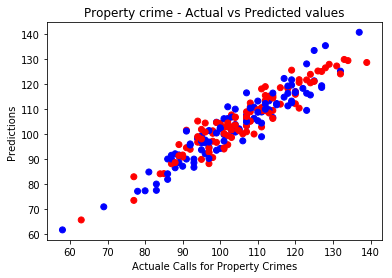

In [39]:
plt.scatter(y2_test, predictions, color=['red','blue'])
plt.xlabel('Actuale Calls for Property Crimes')
plt.ylabel('Predictions')
plt.title('Property crime - Actual vs Predicted values')

In [40]:
mse = mean_squared_error(y2_test, predictions)
rmse = np.sqrt(mse)
r2_score = lm.score(X2_test,y2_test)
errors = abs(predictions - y2_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y2_test)

In [41]:
print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 20.47
Root Mean Squared Error (RMSE): 4.5241
r2_score: 0.8899
Mean Absolute Error (MAE): 3.66
Mean Absolute Percent Error (MAPE): 3.50


In [42]:
search_space = [{"classifier":LinearRegression(),
                 'params':{'n_jobs':[-1]}},
                {"classifier":RandomForestRegressor(n_jobs=-1),
                 "params":{"n_estimators": np.arange(8,9,1),"max_features":['sqrt', 'log2']}},
               {"classifier": GradientBoostingRegressor(),
                'params':{"alpha": np.arange(0.7,0.9,.1), "loss":['ls','quantile']}},
               ]
best_acc = 0.0
best_clf = 0
for row in search_space:
    random_search = GridSearchCV(row['classifier'],param_grid = row['params'], cv=5)
    random_search.fit(X2, y2.ravel())
    print (random_search.best_params_)
    predictions = random_search.predict(X2_test)
    accuracy = metrics.r2_score(y2_test, predictions)
    mse = metrics.mean_squared_error(y2_test, predictions)
    print("mean squared error:", mse)
    print('Test set accuracy (r2_score) for best params: %.3f ' % accuracy)
    if accuracy > best_acc:
          best_acc = accuracy
          best_clf = row['classifier']
print("Best Acuracy score: %.3f " %best_acc)
print("Best Regressor: ",best_clf)

{'n_jobs': -1}
mean squared error: 20.467675442928655
Test set accuracy (r2_score) for best params: 0.890 
{'max_features': 'sqrt', 'n_estimators': 8}
mean squared error: 23.387704439252335
Test set accuracy (r2_score) for best params: 0.874 
{'alpha': 0.8999999999999999, 'loss': 'ls'}
mean squared error: 21.718075554067465
Test set accuracy (r2_score) for best params: 0.883 
Best Acuracy score: 0.890 
Best Regressor:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
